In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from mpl_toolkits import mplot3d

In [ ]:
def plot(X, y, **kwargs):
  plt.figure(figsize=(12, 8))
  plt.scatter(X, y, **kwargs)

# Задание 1
Обучите модель KNN для задачи классификации на данном 'игрушечном' датасете. Обучать при помощи GridSearchCV. Показать скор и лучшие гиперпараметры.

In [ ]:
# Фиксируем сид 
np.random.seed(42)

# Генерируем датасет
X, y = make_blobs(n_samples=300, centers=4, n_features=2)

# Осложним задачу сделая разный масштаб призанков
X[:, 0] += 10000
X[:, 1] += 1000

Отобразим тренировочный набор

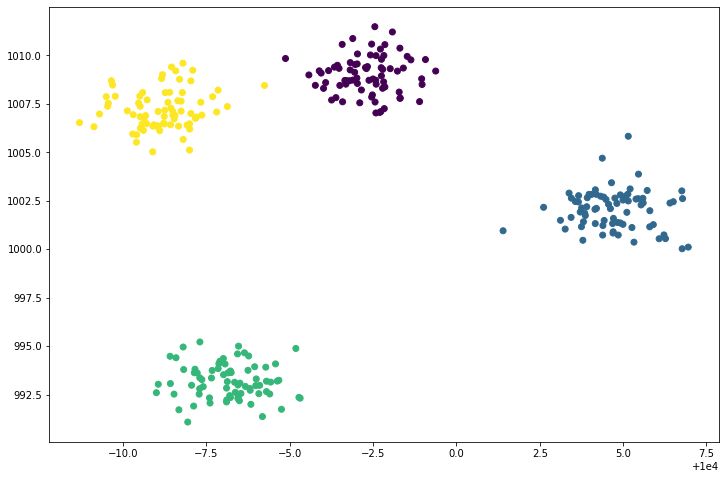

In [ ]:
plot(X[:, 0], X[:, 1], c=y)

## Приводим признаки к одному масштабу

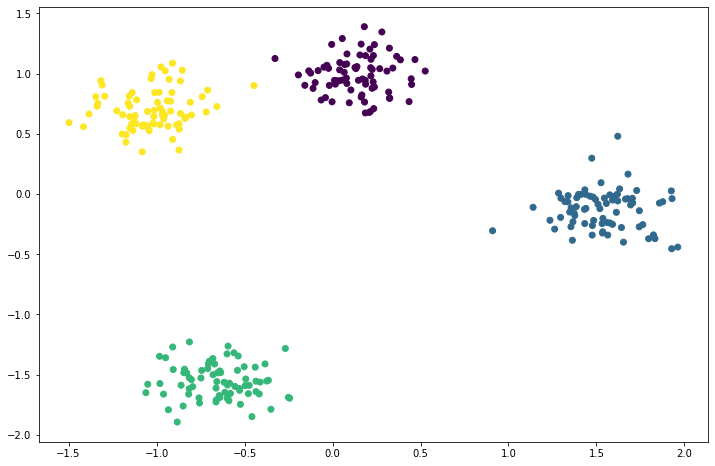

У каждого признака разная дисперсия

In [ ]:
scaler.var_

array([27.88190204, 38.63066179])

И разное среднее

In [ ]:
scaler.mean_

array([9996.59616319, 1002.84532851])

## Обучаем модель

# Задание 2
Создайте модель для прогнозирования цен домов в калифорнии с учётом координат дома. Обучать при помощи GridSearchCV. Показать скор и лучшие гиперпараметры.

In [ ]:
df = pd.read_csv("/content/housing.csv")
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Выведем координаты домов из тренировочного датасета

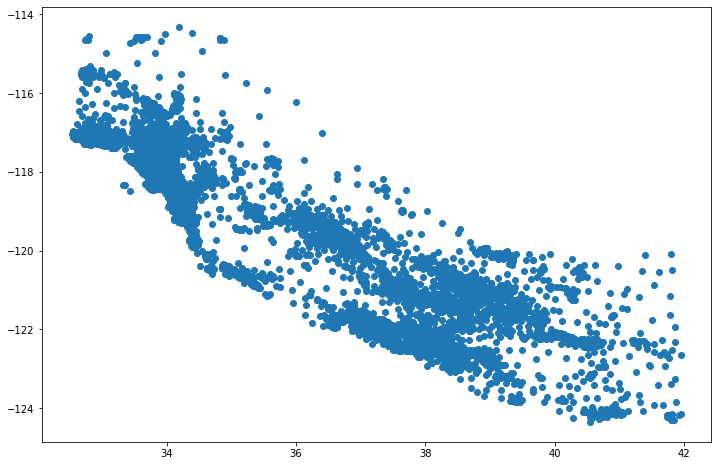

In [ ]:
plot(df["latitude"], df["longitude"])

Мы по координатам будем предсказывать median_house_value. Предположение нашей модели будет звучать как "Дома расположенные рядом имеют примерно одинаковую цену". Предположение не всегда верное, но часть смысла в этом есть.

In [ ]:
X = df[["latitude", "longitude", "median_house_value"]]
X.drop("median_house_value", axis=1, inplace=True)

y = df["median_house_value"] / 1000

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Обучаем модель

# Задание 3
Обучить классификатор на датасете ирисов. Обучать при помощи GridSearchCV. Показать скор и лучшие гиперпараметры.

In [6]:
iris = load_iris()
X = iris["data"]
y = iris["target"]

Можно комбинировать признаки в разном порядке (так как у нас 4 измерения). Но именно это изображение должно показать вам, что классы можно разделить при помощи KNN.

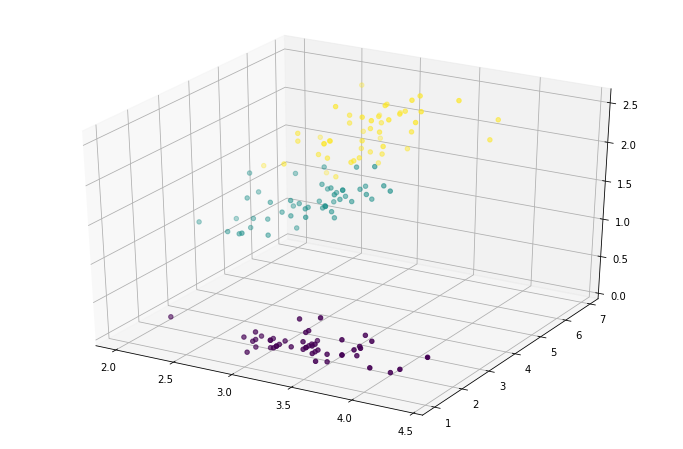

In [11]:
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 1], X[:, 2], X[:, 3], c=y);

## Обучение модели